<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Twitter Data</h1>

<hr>


### ☑️ Objectives
At the end of this session, you will be able to:
- [ ] Understand how to find and run pre-trained models
- [ ] Evaluate results from pre-trained models
- [ ] Run a pre-trained model using real twitter data


### 🔨 Pre-Assignment

Create a new Conda environment for sentiment anaylsis (sa)

```bash
  conda create -n sa python=3.8 jupyter -y
```

Activate your new environment
```bash
  conda activate sa
```

Open the jupyter-notebook
```bash
  jupyter-notebook
```

Navigate through the repo in the notebook to find `imports.ipynb` for this week and open it.

Run all of the cells in the notebook.


### Background
Please review the weekly narrative [here](https://www.notion.so/Week-2-Data-Centric-AI-the-AI-Product-Lifecycle-72a84c1517b44fcbb3e6bd11d47477dc#2b73937612bb46559f5b91dc2bf55e7d)




<hr>

## 🚀 Let's Get Started

Let's first start with our imports

In [1]:
import csv # Allows us to read and write csv files
from pprint import pprint # Make our print functions easier to read
import pandas as pd # Better csv reader

from transformers import pipeline # Hugging face pipeline to load online models

🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:
- 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.

- 🖼️ Images, for tasks like image classification, object detection, and segmentation.
- 🗣️ Audio, for tasks like speech recognition and audio classification.

This is the pipeline method in transformers that we'll be using to analyze our sentiment data. Since we're not specifying a pretrained model, the pipeline has a default sentiment analysis model called [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).

In [2]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In this example, we'll supply two polar sentiments and test out the model pipeline.

In [4]:
data = ["This is great!", "Oh no!"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.994263231754303}]

The `label` in this case indicates the prediction for the sentiment type.

The `score` indicates the confidence of the prediction (between 0 and 1).

Since our sentiments were very polar, it was easier for the model to predict the sentiment type.

Let's see what happens when we use a less clear example:

In [5]:
challenging_sentiments = ["I don't think freddriq should leave, he's been helpful.",
                          "Is that the lake we went to last month?"]
sentiment_pipeline(challenging_sentiments)

[{'label': 'NEGATIVE', 'score': 0.9955561757087708},
 {'label': 'NEGATIVE', 'score': 0.9860844016075134}]

<hr>

### Loading the Twitter Data

Let's play with some twitter data. We'll be using a modified version of the [Elon Musk twitter dataset on Kaggle](https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets).

In [9]:
df = pd.read_csv('../data/elonmusk_tweets.csv', names=['tweet'])  # This is not really a csv, just a text file
df

,tweet
0,@vincent13031925 For now. Costs are decreasing...
1,Love this beautiful shot
2,@agnostoxxx @CathieDWood @ARKInvest Trust the ...
3,The art In Cyberpunk is incredible
4,@itsALLrisky 🤣🤣
...,...
12557,"@eugenelee3 @PPathole @SpaceX @Tesla Yeah, not..."
12558,@PPathole @SpaceX @Tesla That was my night job...
12559,@PPathole @SpaceX @Tesla True. Ancient times …...
12560,@Erdayastronaut @Tesla Absolutely


First things first - let's look at the sentiment as determined by the [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) (default model) in the pipeline.

In [11]:
distil_sentiment = sentiment_pipeline(list(df['tweet'].values))

Let's check out the distribution of positive/negative Tweets and see the breakdown using Python's 🐍 standard library `collections.Counter`!

In [13]:
distil_df = pd.DataFrame(distil_sentiment)
distil_df.describe()

,score
count,12562.000000
mean,0.952361
std,0.096420
min,0.500018
25%,0.965393
50%,0.991955
75%,0.997941
max,0.999886


Let's do that process again, but use a model with an additional potential label "NEUTRAL" called [bertweet-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

To start - we'll build a pipeline with the new model by using the 🤗 Hugging Face address: `finiteautomata/bertweet-base-sentiment-analysis`

In [9]:
bertweet_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Next, and the same as before, let's run the analysis on 100 of Elon's tweets.

In [8]:
bert_sentiment = bertweet_pipeline(list(df['tweet'].values))

NameError: name 'bertweet_pipeline' is not defined

And then, let's check out the breakdown of positive, negative, AND neutral sentiments!

In [16]:
bert_df = pd.DataFrame(bert_sentiment)
print(bert_df)
bert_df.describe()

      label     score
0       NEU  0.952393
1       POS  0.990994
2       NEU  0.973386
3       POS  0.982427
4       NEG  0.962732
...     ...       ...
12557   NEU  0.520728
12558   POS  0.595945
12559   NEG  0.782732
12560   POS  0.715958
12561   POS  0.696965

[12562 rows x 2 columns]


,score
count,12562.000000
mean,0.851021
std,0.137383
min,0.344159
25%,0.768498
50%,0.907914
75%,0.961667
max,0.992863


In [17]:
df, distil_df, bert_df

(                                                   tweet
 0      @vincent13031925 For now. Costs are decreasing...
 1                               Love this beautiful shot
 2      @agnostoxxx @CathieDWood @ARKInvest Trust the ...
 3                     The art In Cyberpunk is incredible
 4                                        @itsALLrisky 🤣🤣
 ...                                                  ...
 12557  @eugenelee3 @PPathole @SpaceX @Tesla Yeah, not...
 12558  @PPathole @SpaceX @Tesla That was my night job...
 12559  @PPathole @SpaceX @Tesla True. Ancient times …...
 12560                  @Erdayastronaut @Tesla Absolutely
 12561  @Erdayastronaut @Tesla Tesla is building up co...
 
 [12562 rows x 1 columns],
           label     score
 0      NEGATIVE  0.996366
 1      POSITIVE  0.999882
 2      NEGATIVE  0.849832
 3      POSITIVE  0.999886
 4      NEGATIVE  0.983950
 ...         ...       ...
 12557  NEGATIVE  0.999204
 12558  NEGATIVE  0.987740
 12559  NEGATIVE  0.986868
 1256

In [18]:
tweet_df = df.merge(distil_df, left_index=True, right_index=True).merge(bert_df, left_index=True, right_index=True, suffixes=['_distil', '_bert'])
tweet_df

,tweet,label_distil,score_distil,label_bert,score_bert
0,@vincent13031925 For now. Costs are decreasing...,NEGATIVE,0.996366,NEU,0.952393
1,Love this beautiful shot,POSITIVE,0.999882,POS,0.990994
2,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,NEGATIVE,0.849832,NEU,0.973386
3,The art In Cyberpunk is incredible,POSITIVE,0.999886,POS,0.982427
4,@itsALLrisky 🤣🤣,NEGATIVE,0.983950,NEG,0.962732
...,...,...,...,...,...
12557,"@eugenelee3 @PPathole @SpaceX @Tesla Yeah, not...",NEGATIVE,0.999204,NEU,0.520728
12558,@PPathole @SpaceX @Tesla That was my night job...,NEGATIVE,0.987740,POS,0.595945
12559,@PPathole @SpaceX @Tesla True. Ancient times …...,NEGATIVE,0.986868,NEG,0.782732
12560,@Erdayastronaut @Tesla Absolutely,POSITIVE,0.996573,POS,0.715958


In [19]:
tweet_df[(tweet_df['label_distil'].str[:3] != tweet_df['label_bert']) & (tweet_df['label_bert'] != 'NEU')]

,tweet,label_distil,score_distil,label_bert,score_bert
8,Blimps rock https://t.co/e8cu5FkNOI,NEGATIVE,0.993785,POS,0.609027
19,Kong vs Godzilla has record for most meth ever...,POSITIVE,0.621602,NEG,0.763040
26,@AustinTeslaClub @OwenSparks_ @WholeMarsBlog G...,NEGATIVE,0.984065,POS,0.894048
34,@cleantechnica Congrats to NIO. That is a toug...,NEGATIVE,0.554293,POS,0.989051
41,Soon our monkey will be on twitch &amp; discor...,NEGATIVE,0.777532,POS,0.505962
...,...,...,...,...,...
12458,The exec conf room at Tesla used to be called ...,NEGATIVE,0.997439,POS,0.652339
12491,"It was Xmas, so we brought presents for the ki...",NEGATIVE,0.997753,POS,0.777680
12528,"@Erdayastronaut @thesheetztweetz Yeah, should ...",NEGATIVE,0.997490,POS,0.550293
12555,@PPathole @SwiftOnSecurity Getting there,NEGATIVE,0.987638,POS,0.504522


In [27]:
tweet_df['label_bert'].value_counts()

NEU    7787
POS    3327
NEG    1448
Name: label_bert, dtype: int64

In [28]:
747 / (3327 + 1448)

0.15643979057591623

In [20]:
import seaborn as sns

<AxesSubplot:ylabel='label_distil'>

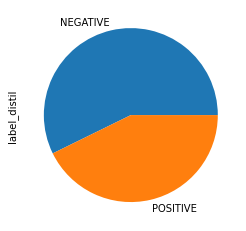

In [25]:
tweet_df['label_distil'].value_counts().plot.pie()

<AxesSubplot:ylabel='label_bert'>

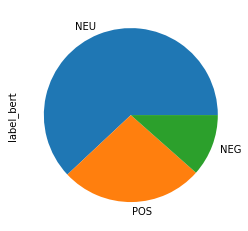

In [26]:
tweet_df['label_bert'].value_counts().plot.pie()

❓ What do you notice about the difference in the results? 
most of the negative, and some of the positive, are acually neutral. This is what i'd guess for most people's tweets (obvious outliers excluded)

❓ Do the results for the `bertweet-base` model look better, or worse, than the results for the `distilbert-base` model? Why?
Yes because of neutral. However, as seen below, "Trust the shrub" is shown as negative and neutral. I disagree, should be positive (though idk what shrub he means).

In [15]:
for tweet, distil, bert in zip(tweets[:5], distil_sentiment, bert_sentiment):
    print(",".join([str(tweet), str(distil), str(bert)]))

@vincent13031925 For now. Costs are decreasing rapidly.,{'label': 'NEGATIVE', 'score': 0.9963656663894653},{'label': 'NEU', 'score': 0.952393114566803}
Love this beautiful shot,{'label': 'POSITIVE', 'score': 0.9998824596405029},{'label': 'POS', 'score': 0.9909942746162415}
@agnostoxxx @CathieDWood @ARKInvest Trust the shrub,{'label': 'NEGATIVE', 'score': 0.8498324751853943},{'label': 'NEU', 'score': 0.9733855128288269}
The art In Cyberpunk is incredible,{'label': 'POSITIVE', 'score': 0.9998857975006104},{'label': 'POS', 'score': 0.9824265241622925}
@itsALLrisky 🤣🤣,{'label': 'NEGATIVE', 'score': 0.9839497804641724},{'label': 'NEG', 'score': 0.9627320766448975}


<hr>

### Partner Exercise

With your partner, try and determine what the following tweets might be classified as. Try to classify them into the same groups as both of the model pipelines we saw today - and try adding a few of your own sentences/Tweets! 

In [12]:
example_difficult_tweets = [
    "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
    "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
    "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
    "Going to mars is going to happen before we go outside",
    "The pfizer vaccine exists",
]

The `distilbert-base` model:

In [13]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(sentiment_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'POSITIVE', 'score': 0.5429086089134216}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEGATIVE', 'score': 0.6348389983177185}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'POSITIVE', 'score': 0.9419689178466797}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'NEGATIVE', 'score': 0.9032431840896606}]
Going to mars is going to happen before we go outside

[{'label': 'POSITIVE', 'score': 0.9319126605987549}]
The pfizer vaccine exists



The `bertweet-base` model:

In [14]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(bertweet_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'NEG', 'score': 0.7213016152381897}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEU', 'score': 0.8023845553398132}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'NEU', 'score': 0.8843538165092468}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'NEU', 'score': 0.9084119200706482}]
Going to mars is going to happen before we go outside

[{'label': 'NEU', 'score': 0.9259754419326782}]
The pfizer vaccine exists



❓ How did you do? Did you find any surprising results? 
Yeah, 

❓ Are there any instances where the two models gave different predictions for the same tweet?

In [25]:
negation_data = []
for i in range(100):
    negation_data.append("not "*i + "bad")
negation_df = pd.DataFrame(negation_data, columns=['text'])
negation_df

,text
0,bad
1,not bad
2,not not bad
3,not not not bad
4,not not not not bad
...,...
95,not not not not not not not not not not not no...
96,not not not not not not not not not not not no...
97,not not not not not not not not not not not no...
98,not not not not not not not not not not not no...


In [26]:
# import torch
# torch.distributed.init_process_group(backend='gloo')

scores = bertweet_pipeline(list(negation_df['text']), top_k=None)
scores[-5:]

[[{'label': 'NEU', 'score': 0.6235402822494507},
  {'label': 'NEG', 'score': 0.3679775595664978},
  {'label': 'POS', 'score': 0.008482151664793491}],
 [{'label': 'NEU', 'score': 0.6126991510391235},
  {'label': 'NEG', 'score': 0.3788066506385803},
  {'label': 'POS', 'score': 0.008494199253618717}],
 [{'label': 'NEU', 'score': 0.603658139705658},
  {'label': 'NEG', 'score': 0.387899249792099},
  {'label': 'POS', 'score': 0.008442623540759087}],
 [{'label': 'NEU', 'score': 0.6143737435340881},
  {'label': 'NEG', 'score': 0.37714672088623047},
  {'label': 'POS', 'score': 0.008479557931423187}],
 [{'label': 'NEU', 'score': 0.6243600845336914},
  {'label': 'NEG', 'score': 0.3671889901161194},
  {'label': 'POS', 'score': 0.008450922556221485}]]

In [27]:
score_df = pd.DataFrame([[x[0]['label'], x[0]['score'], x[1]['label'], x[1]['score'], x[2]['label'], x[2]['score']] for x in scores], columns=['label_0', 'score_0', 'label_1', 'score_1', 'label_2', 'score_2'])
score_df

,label_0,score_0,label_1,score_1,label_2,score_2
0,NEG,0.890787,NEU,0.092434,POS,0.016780
1,POS,0.979815,NEU,0.017561,NEG,0.002623
2,POS,0.984266,NEU,0.013773,NEG,0.001961
3,POS,0.985005,NEU,0.012725,NEG,0.002270
4,POS,0.981906,NEU,0.014461,NEG,0.003634
...,...,...,...,...,...,...
95,NEU,0.623540,NEG,0.367978,POS,0.008482
96,NEU,0.612699,NEG,0.378807,POS,0.008494
97,NEU,0.603658,NEG,0.387899,POS,0.008443
98,NEU,0.614374,NEG,0.377147,POS,0.008480


<AxesSubplot:ylabel='label_0'>

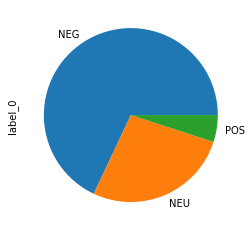

In [28]:
score_df['label_0'].value_counts().plot.pie()

<AxesSubplot:ylabel='label_1'>

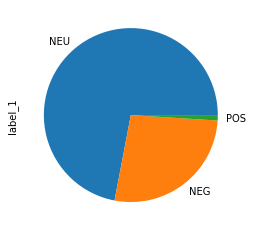

In [29]:
score_df['label_1'].value_counts().plot.pie()

<AxesSubplot:ylabel='label_2'>

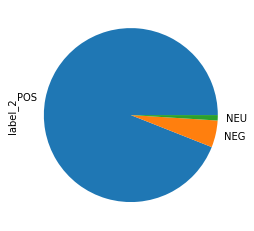

In [30]:
score_df['label_2'].value_counts().plot.pie()

<AxesSubplot:ylabel='Frequency'>

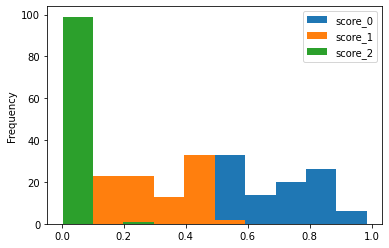

In [31]:
score_df.plot.hist(['score_0', 'score_1', 'score_2'])

<AxesSubplot:>

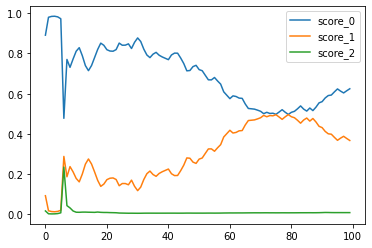

In [32]:
score_df.plot.line(y=['score_0', 'score_1', 'score_2'])

In [36]:
import numpy as np
for prefix in ['pos', 'neg', 'neu']:
    score_df[f'{prefix}_score'] = np.where(score_df['label_0'] == prefix.upper(), score_df['score_0'], np.where(score_df['label_1'] == prefix.upper(), score_df['score_1'], score_df['score_2']))
score_df

,label_0,score_0,label_1,score_1,label_2,score_2,pos_score,neg_score,neu_score,pos,neg,neu
0,NEG,0.890787,NEU,0.092434,POS,0.016780,0.016780,0.890787,0.092434,0.016780,0.016780,0.016780
1,POS,0.979815,NEU,0.017561,NEG,0.002623,0.979815,0.002623,0.017561,0.002623,0.002623,0.002623
2,POS,0.984266,NEU,0.013773,NEG,0.001961,0.984266,0.001961,0.013773,0.001961,0.001961,0.001961
3,POS,0.985005,NEU,0.012725,NEG,0.002270,0.985005,0.002270,0.012725,0.002270,0.002270,0.002270
4,POS,0.981906,NEU,0.014461,NEG,0.003634,0.981906,0.003634,0.014461,0.003634,0.003634,0.003634
...,...,...,...,...,...,...,...,...,...,...,...,...
95,NEU,0.623540,NEG,0.367978,POS,0.008482,0.008482,0.367978,0.623540,0.008482,0.008482,0.008482
96,NEU,0.612699,NEG,0.378807,POS,0.008494,0.008494,0.378807,0.612699,0.008494,0.008494,0.008494
97,NEU,0.603658,NEG,0.387899,POS,0.008443,0.008443,0.387899,0.603658,0.008443,0.008443,0.008443
98,NEU,0.614374,NEG,0.377147,POS,0.008480,0.008480,0.377147,0.614374,0.008480,0.008480,0.008480


<AxesSubplot:>

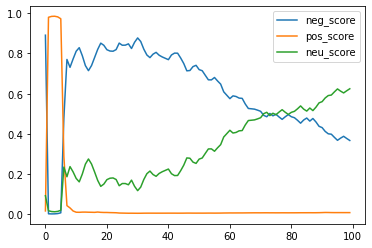

In [37]:
score_df.plot.line(y=['neg_score', 'pos_score', 'neu_score'])